In [9]:
import ast
import os
import cv2
import json
from matplotlib import patches
import pandas as pd
# from detection_utils.detections_drawer import draw_intersection
from detection_utils.metrics import IoU
import matplotlib
import matplotlib.pyplot as plt

In [7]:
def draw_intersection(image, gtbox, pbox, ax:matplotlib.axes.Axes):
    if type(image) is bytes:
        image = cv2.imdecode(image, cv2.IMREAD_COLOR)
    else:
        image = cv2.imread(image)
    
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(image)
    wgt = gtbox[2] - gtbox[0]
    hgt = gtbox[3] - gtbox[1]
    
    wp = pbox[2] - pbox[0]
    hp = pbox[3] - pbox[1]
    gt = patches.Rectangle((gtbox[0], gtbox[1]), wgt, hgt,edgecolor='g', facecolor='none', linewidth=1)
    ax.add_patch(gt)
    
    p = patches.Rectangle((pbox[0], pbox[1]), wp, hp, edgecolor='m', facecolor='none', linewidth=1)
    ax.add_patch(p)
    
    ibox, iou = IoU(gtbox, pbox)
    if iou > 0:
        wi = ibox[2] - ibox[0]
        hi = ibox[3] - ibox[1]
        inter = patches.Rectangle((ibox[0], ibox[1]), wi, hi, facecolor='c', alpha=0.2)
        ax.add_patch(inter)
    
    ax.text(gtbox[0] + wgt / 2, gtbox[3], f"IoU: {iou:.2f}", horizontalalignment='center', verticalalignment='bottom', color='w')

In [ ]:
%cd ..

In [4]:
df = pd.read_csv(os.path.join("workspace/exported_models/yolov8m_lego_416_bsize_16", "validation_results.csv"))
df["boxes"] = [*map(ast.literal_eval, df.boxes.to_list())]
df["original_class"] = df["image"].apply(lambda z: z[:-9])
df["class_is_best"] = df["best_class"] == df["original_class"]

In [5]:
item = df.iloc[0]

In [ ]:
with open(os.path.join("bricks", item["image"][:-9], '.'.join([*item["image"].split('.')[:-1], 'json'])), 'r') as infile:
    data = json.load(infile)

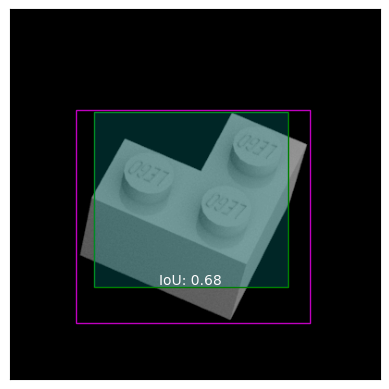

In [8]:
axes = plt.axes()
draw_intersection(os.path.join("bricks", item["image"][:-9], item["image"]), [90,110,300,300], item["boxes"][0], axes)
plt.show()